In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
np.random.seed(2)
#pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df.drop(columns=['org:resource'], inplace=True)
df['next_event'] = df['concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
df['next_case'] = df['case:concept:name'].shift(-1).fillna(0)
df['next_case1'] = df['next_case'].shift(-1).fillna(0)
df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', utc=True)
df['weekday'] = df['datetime'].dt.weekday
df['previous_weekday'] = df['weekday'].shift(1)
df['hour'] =  df['datetime'].dt.hour
df['minute'] =  df['datetime'].dt.minute
df['month'] =  df['datetime'].dt.month
df['next_datetime'] = df['datetime'].shift(-1)
df['timedelta'] = (df['next_datetime'] - df['datetime']).astype('timedelta64[s]')
df = df[(df['case:concept:name'].astype(int)) == (df['next_case'].astype(int))]
df['previous_timedelta'] = df['timedelta'].shift(1)
df['pp_timedelta'] = df['timedelta'].shift(2)
df['ppp_timedelta'] = df['timedelta'].shift(3)
print(len(df))
df.dropna(inplace=True)
df.iloc[:10]
dfxx = df[['hour', 'minute', 'previous_timedelta', 'pp_timedelta', 'ppp_timedelta']]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition', 'weekday', 'month']]
dfy = (df[['timedelta']])
valx = dfx
valy = dfy
dummies = pd.get_dummies(dfx.astype('str'))
dfx = dfxx.join(dummies)
trainlen = int(len(df)*0.7)
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
df2 = x_train.join(y_train)
dftest = x_test.join(y_test)
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.iloc[-100:]

249113
249110


,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,next_event,previous_event,pp_event,ppp_event,...,weekday,previous_weekday,hour,minute,month,next_datetime,timedelta,previous_timedelta,pp_timedelta,ppp_timedelta
262092,COMPLETE,O_SENT_BACK,2012-03-09 10:43:23.173000+01:00,2012-02-29 22:42:41.754000+01:00,214355,5000,W_Valideren aanvraag,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,...,4,4.0,9,43,3,2012-03-09 09:43:23.314000+00:00,0.0,10.0,569730.0,1.0
262093,SCHEDULE,W_Valideren aanvraag,2012-03-09 10:43:23.314000+01:00,2012-02-29 22:42:41.754000+01:00,214355,5000,W_Nabellen offertes,O_SENT_BACK,W_Nabellen offertes,W_Completeren aanvraag,...,4,4.0,9,43,3,2012-03-09 09:43:24.987000+00:00,1.0,0.0,10.0,569730.0
262095,COMPLETE,A_SUBMITTED,2012-02-29 22:43:26.064000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_PARTLYSUBMITTED,W_Nabellen offertes,W_Valideren aanvraag,O_SENT_BACK,...,2,4.0,21,43,2,2012-02-29 21:43:26.263000+00:00,0.0,1.0,0.0,10.0
262096,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 22:43:26.263000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_PREACCEPTED,A_SUBMITTED,W_Nabellen offertes,W_Valideren aanvraag,...,2,2.0,21,43,2,2012-02-29 21:43:57.138000+00:00,30.0,0.0,1.0,0.0
262097,COMPLETE,A_PREACCEPTED,2012-02-29 22:43:57.138000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,A_PARTLYSUBMITTED,A_SUBMITTED,W_Nabellen offertes,...,2,2.0,21,43,2,2012-02-29 21:43:57.548000+00:00,0.0,30.0,0.0,1.0
262098,SCHEDULE,W_Completeren aanvraag,2012-02-29 22:43:57.548000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,A_SUBMITTED,...,2,2.0,21,43,2,2012-03-01 09:09:27.984000+00:00,41130.0,0.0,30.0,0.0
262099,START,W_Completeren aanvraag,2012-03-01 10:09:27.984000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,...,3,2.0,9,9,3,2012-03-01 09:30:29.681000+00:00,1261.0,41130.0,0.0,30.0
262100,COMPLETE,W_Completeren aanvraag,2012-03-01 10:30:29.681000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,...,3,3.0,9,30,3,2012-03-01 15:53:53.903000+00:00,23004.0,1261.0,41130.0,0.0
262101,START,W_Completeren aanvraag,2012-03-01 16:53:53.903000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,3,3.0,15,53,3,2012-03-01 16:01:02.397000+00:00,428.0,23004.0,1261.0,41130.0
262102,COMPLETE,A_ACCEPTED,2012-03-01 17:01:02.397000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,O_SELECTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,3,3.0,16,1,3,2012-03-01 16:03:41.306000+00:00,158.0,428.0,23004.0,1261.0


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
#splitter NN
lrelu = tf.keras.layers.LeakyReLU(alpha=0.3)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(228, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

msle = tf.keras.losses.MeanSquaredLogarithmicError()
def loss_comb(y_true, y_pred):
    return 1*msle(y_true, y_pred) + 0.00000001*(loss_fn(y_true, y_pred))

model.compile(optimizer=ftrl,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 121)               0         
                                                                 
 batch_normalization (BatchN  (None, 121)              484       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 228)               27816     
                                                                 
 batch_normalization_1 (Batc  (None, 228)              912       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               29312     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [5]:
#splitter NN
model.fit(x_train, y_train, epochs=15, batch_size=512, validation_split=0.0, shuffle=True)

Epoch 1/15
341/341 [==============================] - 6s 13ms/step - loss: 18320721920.0000 - mean_absolute_error: 42780.0781
Epoch 2/15
341/341 [==============================] - 5s 14ms/step - loss: 15803129856.0000 - mean_absolute_error: 38194.2383
Epoch 3/15
341/341 [==============================] - 5s 13ms/step - loss: 15690520576.0000 - mean_absolute_error: 37062.9492
Epoch 4/15
341/341 [==============================] - 5s 13ms/step - loss: 15602575360.0000 - mean_absolute_error: 36566.6562
Epoch 5/15
341/341 [==============================] - 5s 13ms/step - loss: 15547569152.0000 - mean_absolute_error: 36284.7930
Epoch 6/15
341/341 [==============================] - 5s 14ms/step - loss: 15501248512.0000 - mean_absolute_error: 36270.6992
Epoch 7/15
341/341 [==============================] - 5s 14ms/step - loss: 15411978240.0000 - mean_absolute_error: 36181.5312
Epoch 8/15
341/341 [==============================] - 5s 13ms/step - loss: 15429920768.0000 - mean_absolute_error: 361

In [6]:
model.evaluate(x_test,  y_test, verbose=2)

2336/2336 - 11s - loss: 11952415744.0000 - mean_absolute_error: 37126.6953 - 11s/epoch - 5ms/step


[11952415744.0, 37126.6953125]

1557/1557 - 6s - loss: 16145751040.0000 - mean_absolute_error: 38487.3203 - 6s/epoch - 4ms/step
[16145751040.0, 38487.3203125] 100 epoch

1557/1557 - 6s - loss: 12990233600.0000 - mean_absolute_error: 39434.7891 - 6s/epoch - 4ms/step
[12990233600.0, 39434.7890625] 10 epoch

1557/1557 - 6s - loss: 12379001856.0000 - mean_absolute_error: 39955.4883 - 6s/epoch - 4ms/step
[12379001856.0, 39955.48828125] 5 epoch

1557/1557 - 7s - loss: 16281440256.0000 - mean_absolute_error: 34248.9844 - 7s/epoch - 4ms/step
[16281440256.0, 34248.984375] rmsprop 5epoch

1557/1557 - 6s - loss: 13425792000.0000 - mean_absolute_error: 38229.3945 - 6s/epoch - 4ms/step
[13425792000.0, 38229.39453125] ftrl 5 epoch

1557/1557 - 6s - loss: 12477991936.0000 - mean_absolute_error: 38378.7773 - 6s/epoch - 4ms/step
[12477991936.0, 38378.77734375] ftrl 25 epoch

1557/1557 - 6s - loss: 13436874752.0000 - mean_absolute_error: 37503.7383 - 6s/epoch - 4ms/step
[13436874752.0, 37503.73828125] ftrl 20 epoch 

1557/1557 - 6s - loss: 12613310464.0000 - mean_absolute_error: 36718.5391 - 6s/epoch - 4ms/step
[12613310464.0, 36718.5390625] ftrl shrinkage 0.1 beta 0.1 20 epoch 

1557/1557 - 6s - loss: 22985072640.0000 - mean_absolute_error: 38325.5352 - 6s/epoch - 4ms/step
[22985072640.0, 38325.53515625] 100 epoch

1557/1557 - 5s - loss: 11458832384.0000 - mean_absolute_error: 36769.4922 - 5s/epoch - 3ms/step
[11458832384.0, 36769.4921875] 20 epoch

1557/1557 - 6s - loss: 10764874752.0000 - mean_absolute_error: 33928.1797 - 6s/epoch - 4ms/step
[10764874752.0, 33928.1796875] 5 epoch

1557/1557 - 7s - loss: 10972633088.0000 - mean_absolute_error: 34962.5430 - 7s/epoch - 4ms/step
[10972633088.0, 34962.54296875] l2 in model, no dropout

1557/1557 - 6s - loss: 10712907776.0000 - mean_absolute_error: 33294.6133 - 6s/epoch - 4ms/step
[10712907776.0, 33294.61328125] 0.01 l1, l2

1557/1557 - 6s - loss: 12210000896.0000 - mean_absolute_error: 44738.8945 - 6s/epoch - 4ms/step
[12210000896.0, 44738.89453125]

1557/1557 - 6s - loss: 10496494592.0000 - mean_absolute_error: 31814.3359 - 6s/epoch - 4ms/step
[10496494592.0, 31814.3359375]

2336/2336 - 10s - loss: 5.0835 - mean_absolute_error: 36537.7109 - 10s/epoch - 4ms/step
[5.083494186401367, 36537.7109375]

1557/1557 - 7s - loss: 11157584896.0000 - mean_absolute_error: 36030.8945 - 7s/epoch - 4ms/step
[11157584896.0, 36030.89453125]

In [7]:
predictions = model(x_test).numpy()

In [8]:
predictions_train = model(x_train).numpy()
predictions_test = model(x_test).numpy()

In [9]:
df2['predictions_train'] = predictions_train
dftest['predictions_test'] = predictions_test
df2.iloc[:100]

,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,weekday_6,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_train
3,22,39,0.0,53.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,39427.0,54188.632812
4,9,36,39427.0,0.0,53.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,356.0,2176.793213
5,9,42,356.0,39427.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,145.0,-107.586792
6,9,45,145.0,356.0,39427.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,6994.241211
7,9,45,0.0,145.0,356.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,983.437561
8,9,45,1.0,0.0,145.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,4762.093262
9,9,45,0.0,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,3207.193604
10,9,45,0.0,0.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.0,-7.558267
11,9,45,2.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1827.0,249511.500000
12,10,15,1827.0,2.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,87.0,261.536743


In [10]:
#test and train split on split-NN prediction
p=80
q=30
df2_short = df2[df2['predictions_train'] < np.nanpercentile(df2['predictions_train'], q)]
df2_long = df2[df2['predictions_train'] > np.nanpercentile(df2['predictions_train'], p)]
df2_mid = df2[(df2['predictions_train'] <= np.nanpercentile(df2['predictions_train'], p)) & (df2['predictions_train'] >= np.nanpercentile(df2['predictions_train'], q))]
dftest_long = dftest[dftest['predictions_test'] >= np.nanpercentile(dftest['predictions_test'], p)]
dftest_short = dftest[dftest['predictions_test'] < np.nanpercentile(dftest['predictions_test'], q)]
dftest_mid = dftest[(dftest['predictions_test'] <= np.nanpercentile(dftest['predictions_test'], p)) & (dftest['predictions_test'] >= np.nanpercentile(dftest['predictions_test'], q))]
print(np.nanpercentile(dftest['predictions_test'], p))
print(np.nanpercentile(df2['predictions_train'], q))
df2_mid.iloc[:100]

44081.55000000015
244.19000244140625


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,weekday_6,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_train
4,9,36,39427.0,0.0,53.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,356.0,2176.793213
6,9,45,145.0,356.0,39427.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,6994.241211
7,9,45,0.0,145.0,356.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,983.437561
8,9,45,1.0,0.0,145.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,4762.093262
9,9,45,0.0,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,3207.193604
12,10,15,1827.0,2.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,87.0,261.536743
14,14,26,619788.0,87.0,1827.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,303.0,377.081940
16,9,32,154821.0,303.0,619788.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,41.0,352.952850
18,9,33,0.0,41.0,154821.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,284.558258
20,8,5,253941.0,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1922.0,2087.655518


In [11]:
#df2_long.iloc[:100]

In [12]:
#creates short training data
x = df2_short.drop(columns=['timedelta', 'predictions_train'])
y = pd.DataFrame(df2_short['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_train

<tf.Tensor: shape=(52313, 121), dtype=float64, numpy=
array([[9.00000e+00, 4.20000e+01, 3.56000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.00000e+00, 4.50000e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.00000e+00, 3.30000e+01, 4.10000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.30000e+01, 2.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.30000e+01, 2.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.40000e+01, 2.40000e+01, 3.48382e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])>

In [13]:
#SHORT MODEL 
model_short = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(128, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(48, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model_short.summary()

loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.7,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

model_short.compile(optimizer=ftrl,
              loss=msle,
              metrics=['mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 121)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 121)              484       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 128)               15616     
                                                                 
 dense_6 (Dense)             (None, 48)                6192      
                                                                 
 dense_7 (Dense)             (None, 48)                2352      
                                                                 
 dense_8 (Dense)             (None, 1)                 49        
                                                      

In [14]:
model_short.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.1, shuffle=True)

Epoch 1/10
92/92 [==============================] - 2s 15ms/step - loss: 3.3111 - mean_absolute_error: 108.7147 - val_loss: 3.0683 - val_mean_absolute_error: 158.9636
Epoch 2/10
92/92 [==============================] - 1s 14ms/step - loss: 1.9286 - mean_absolute_error: 103.0284 - val_loss: 2.1994 - val_mean_absolute_error: 155.3396
Epoch 3/10
92/92 [==============================] - 1s 13ms/step - loss: 1.8752 - mean_absolute_error: 102.2123 - val_loss: 2.3310 - val_mean_absolute_error: 154.8541
Epoch 4/10
92/92 [==============================] - 1s 13ms/step - loss: 1.8652 - mean_absolute_error: 102.0634 - val_loss: 2.1058 - val_mean_absolute_error: 153.5576
Epoch 5/10
92/92 [==============================] - 1s 13ms/step - loss: 1.1986 - mean_absolute_error: 100.1783 - val_loss: 1.1621 - val_mean_absolute_error: 150.3429
Epoch 6/10
92/92 [==============================] - 1s 13ms/step - loss: 0.8200 - mean_absolute_error: 98.9016 - val_loss: 1.1584 - val_mean_absolute_error: 150.1731

In [15]:
predictions_short = model_short(x_train).numpy()

In [16]:
df2_short['predictions_short'] = predictions_short

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\3082676455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_short['predictions_short'] = predictions_short


In [17]:
print('short error old', np.square(abs(df2_short['timedelta'] - df2_short['predictions_train'])).mean())

short error old 6626827.797925294


In [18]:
np.square(abs(df2_short['timedelta'] - df2_short['predictions_short'])).mean()

6592858.763113444

In [19]:
np.square(np.log(df2_short['timedelta'] + 1.) - np.log(df2_short['predictions_short'] + 1.)).mean()

0.7240398064133431

In [20]:
np.square(np.log(df2_short['timedelta'] + 1.) - np.log(df2_short['predictions_train'] + 1.)).mean()

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


12.5864650413077

In [21]:
#create mid train data long
x = df2_mid.drop(columns=['timedelta', 'predictions_train'])
y = pd.DataFrame(df2_mid['timedelta'])
x_train, y_train = x[:trainlen], y[:trainlen]
x_test, y_test = x[trainlen:], y[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [22]:
#model mid
model_mid = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(228, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish'),
  tf.keras.layers.Dense(1, activation='linear')
])

model_mid.summary()

loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

def loss_comb(y_true, y_pred):
    return 1*msle(y_true, y_pred) + 0.01*(loss_fn(y_true, y_pred))

model_mid.compile(optimizer=ftrl,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 121)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 121)              484       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 228)               27816     
                                                                 
 batch_normalization_6 (Batc  (None, 228)              912       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 128)               29312     
                                                                 
 batch_normalization_7 (Batc  (None, 128)             

In [23]:
model_mid.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.1, shuffle=True)

Epoch 1/10
154/154 [==============================] - 4s 16ms/step - loss: 692324288.0000 - mean_absolute_error: 3856.9099 - val_loss: 282876544.0000 - val_mean_absolute_error: 3266.3606
Epoch 2/10
154/154 [==============================] - 2s 14ms/step - loss: 681694336.0000 - mean_absolute_error: 3686.6733 - val_loss: 262359696.0000 - val_mean_absolute_error: 3025.9199
Epoch 3/10
154/154 [==============================] - 2s 14ms/step - loss: 679092160.0000 - mean_absolute_error: 3631.0884 - val_loss: 256681792.0000 - val_mean_absolute_error: 3267.9219
Epoch 4/10
154/154 [==============================] - 2s 14ms/step - loss: 676516992.0000 - mean_absolute_error: 3632.8071 - val_loss: 251341088.0000 - val_mean_absolute_error: 3201.0210
Epoch 5/10
154/154 [==============================] - 2s 13ms/step - loss: 675350208.0000 - mean_absolute_error: 3626.5552 - val_loss: 254730032.0000 - val_mean_absolute_error: 3040.8420
Epoch 6/10
154/154 [==============================] - 2s 13ms/ste

In [24]:
predictions_mid = model_mid(x_train).numpy()
df2_mid['predictions_mid'] = predictions_mid
np.square((abs(df2_mid['timedelta'] - df2_mid['predictions_mid']))).mean()
df2_mid.iloc[:100]

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\4217655579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_mid['predictions_mid'] = predictions_mid


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_train,predictions_mid
4,9,36,39427.0,0.0,53.0,0,0,0,0,0,...,0,1,0,0,0,0,0,356.0,2176.793213,661.262695
6,9,45,145.0,356.0,39427.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,6994.241211,38.218235
7,9,45,0.0,145.0,356.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1.0,983.437561,514.799744
8,9,45,1.0,0.0,145.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,4762.093262,24.737724
9,9,45,0.0,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,3207.193604,11.990696
12,10,15,1827.0,2.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,87.0,261.536743,1192.496826
14,14,26,619788.0,87.0,1827.0,0,0,0,0,0,...,0,1,0,0,0,0,0,303.0,377.081940,1446.076416
16,9,32,154821.0,303.0,619788.0,0,0,0,0,0,...,0,1,0,0,0,0,0,41.0,352.952850,304.031921
18,9,33,0.0,41.0,154821.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1.0,284.558258,81.337845
20,8,5,253941.0,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1922.0,2087.655518,2210.589600


In [25]:
x = df2_long.drop(columns=['timedelta', 'predictions_train'])
y = pd.DataFrame(df2_long['timedelta'])
x_train, y_train = x[:trainlen], y[:trainlen]
x_test, y_test = x[trainlen:], y[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
predictions_long = model(x_train).numpy()
df2_long['predictions_long'] = predictions_long

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\1820763149.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_long['predictions_long'] = predictions_long


In [26]:
np.square(abs(df2_long['timedelta'] - df2_long['predictions_train'])).mean()

73109767624.73862

In [27]:
np.square(np.log(df2_long['timedelta'] + 1.) - np.log(df2_long['predictions_long'] + 1.)).mean()

15.313629796137796

In [28]:
np.square(np.log(df2_long['timedelta'] + 1.) - np.log(df2_long['predictions_train'] + 1.)).mean()

15.313629796137796

In [29]:
df2_long['mse'] = np.square((abs(df2_long['timedelta'] - df2_long['predictions_long'])))
#df2_long.iloc[:100]

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\4084488403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_long['mse'] = np.square((abs(df2_long['timedelta'] - df2_long['predictions_long'])))


In [30]:
x = dftest_short.drop(columns=['timedelta', 'predictions_test'])
y = pd.DataFrame(dftest_short['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [31]:
predictions_test_short = model_short(x_train).numpy()
dftest_short['predictions'] = predictions_test_short
dftest_short.iloc[:10]

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\4120505552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_short['predictions'] = predictions_test_short


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions
183419,11,20,331833.0,70.0,261859.0,0,0,0,0,0,...,0,0,0,0,1,0,0,67.0,191.421204,62.549450
183429,23,23,0.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,49.0,189.704041,28.445387
183430,23,24,49.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,1.776693,0.368137
183435,12,32,48.0,7.0,604.0,1,0,0,0,0,...,1,0,0,0,0,0,0,30.0,49.968159,81.749886
183436,12,32,30.0,48.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,-952.770325,0.368137
183437,12,32,0.0,30.0,48.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.0,57.337574,0.368137
183438,12,32,1.0,0.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,33.069988,0.368137
183439,12,32,0.0,1.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,39.323467,0.368137
183440,12,32,0.0,0.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.0,168.734528,0.368137
183448,15,44,177568.0,57.0,153623.0,0,0,0,0,0,...,1,0,0,0,0,0,0,54.0,130.564102,62.549435


In [32]:
#create mid train data long
x = dftest_mid.drop(columns=['timedelta', 'predictions_test'])
y = pd.DataFrame(dftest_mid['timedelta'])
x_train, y_train = x[:trainlen], y[:trainlen]
x_test, y_test = x[trainlen:], y[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
predictions_test_mid = model_mid(x_train).numpy()
dftest_mid['predictions'] = predictions_test_mid


C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\3960028065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_mid['predictions'] = predictions_test_mid


In [33]:
dftest_mid.iloc[:10]

,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions
183421,14,32,357050.0,67.0,331833.0,0,0,0,0,0,...,0,0,0,0,1,0,0,38.0,343.331085,1835.222656
183423,8,39,410760.0,38.0,357050.0,0,0,0,0,0,...,0,0,0,0,1,0,0,257.0,8967.317383,649.420349
183425,8,15,343902.0,257.0,410760.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,324.647461,124.546219
183426,8,15,0.0,343902.0,257.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,420.002838,24.486862
183428,23,23,0.0,0.0,343902.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,236.515320,13.872352
183432,12,21,46607.0,0.0,49.0,0,0,0,0,0,...,1,0,0,0,0,0,0,604.0,350.195190,1759.769287
183433,12,31,604.0,46607.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,7.0,34094.269531,24168.324219
183434,12,31,7.0,604.0,46607.0,0,0,0,0,0,...,1,0,0,0,0,0,0,48.0,349.487183,973.959961
183442,16,46,620022.0,1.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,118.0,1753.966431,2149.549805
183444,19,38,96614.0,118.0,620022.0,0,0,0,0,0,...,1,0,0,0,0,0,0,272.0,361.045258,893.892700


In [34]:
x = dftest_long.drop(columns=['timedelta', 'predictions_test'])
y = pd.DataFrame(dftest_long['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [35]:
predictions_test_long = model(x_train).numpy()
dftest_long['predictions'] = predictions_test_long
dftest_long.iloc[:100]

C:\Users\20175892\AppData\Local\Temp\ipykernel_7576\547458668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_long['predictions'] = predictions_test_long


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions
183418,15,10,70.0,261859.0,45.0,0,0,0,0,0,...,0,0,0,0,1,0,0,331833.0,252021.968750,252021.968750
183420,11,21,67.0,331833.0,70.0,0,0,0,0,0,...,0,0,0,0,1,0,0,357050.0,193344.437500,193344.437500
183422,14,33,38.0,357050.0,67.0,0,0,0,0,0,...,0,0,0,0,1,0,0,410760.0,260567.484375,260567.484375
183424,8,43,257.0,410760.0,38.0,0,0,0,0,0,...,0,0,0,0,1,0,0,343902.0,193118.375000,193118.375000
183431,23,24,0.0,49.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,46607.0,89775.484375,89775.484375
183441,12,32,1.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,620022.0,297322.531250,297322.531250
183443,16,48,118.0,620022.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,96614.0,281764.937500,281764.937500
183445,19,43,272.0,96614.0,118.0,0,0,0,0,0,...,1,0,0,0,0,0,0,153623.0,283131.937500,283131.937500
183447,14,24,57.0,153623.0,272.0,0,0,0,0,0,...,1,0,0,0,0,0,0,177568.0,259575.953125,259575.953125
183449,15,45,54.0,177568.0,57.0,0,0,0,0,0,...,1,0,0,0,0,0,0,100788.0,183985.078125,183985.078125


In [36]:
#eval long
print('short old test log', np.square(np.log2(dftest_short['timedelta'] + 1.) - np.log2(dftest_short['predictions_test'] + 1.)).mean())
print('short new test log',np.square(np.log2(dftest_short['timedelta'] + 1.) - np.log2(dftest_short['predictions'] + 1.)).mean(), '\n')
print('short old test mse',np.square(abs(dftest_short['timedelta'] - dftest_short['predictions_test'])).mean())
print('short new test mse',np.square(abs(dftest_short['timedelta'] - dftest_short['predictions'])).mean(), '\n')
print('long old test mse', np.square(abs(dftest_long['timedelta'] - dftest_long['predictions_test'])).mean())
print('long new test mse', np.square(abs(dftest_long['timedelta'] - dftest_long['predictions'])).mean(), '\n')
print('long old test log', np.square(np.log2(dftest_long['timedelta'] + 1.) - np.log2(dftest_long['predictions_test'] + 1.)).mean())
print('long new test log', np.square(np.log2(dftest_long['timedelta'] + 1.) - np.log2(dftest_long['predictions'] + 1.)).mean())

short old test log 25.126837769880026
short new test log 2.227711791548022 

short old test mse 14168128.709048048
short new test mse 14156162.609329896 

long old test mse 58193665617.49349
long new test mse 58193665617.49349 

long old test log 35.922227177875065
long new test log 35.922227177875065


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
dftest_all = pd.concat([dftest_long, dftest_mid, dftest_short], sort=False).sort_index()
dftest_all['error'] = abs(dftest_all['predictions'] - dftest_all['timedelta'])
dftest_all.iloc[3000:3100]

,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions,error
186562,17,6,47.0,0.0,226.0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,296.789795,6.267581,6.267581
186563,17,6,0.0,47.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,1419.765625,9.117002,9.117002
186564,17,6,0.0,0.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,7513.696289,470.413422,469.413422
186565,17,6,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,612574.0,293613.000000,293613.000000,318961.000000
186566,19,16,612574.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,93.0,1675.718872,1442.189575,1349.189575
186567,19,18,93.0,612574.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,73179.0,333463.718750,333463.718750,260284.718750
186568,15,37,73179.0,93.0,612574.0,0,0,0,0,0,...,0,0,0,0,0,0,64.0,380.221283,2296.487793,2232.487793
186569,15,38,64.0,73179.0,93.0,0,0,0,0,0,...,0,0,0,0,0,0,1665.0,240812.828125,240812.828125,239147.828125
186570,16,6,1665.0,64.0,73179.0,0,0,0,0,0,...,0,0,0,0,0,0,29.0,446.323029,1739.182007,1710.182007
186571,16,7,29.0,1665.0,64.0,0,0,0,0,0,...,0,0,0,0,0,0,232215.0,402190.093750,402190.093750,169975.093750


In [38]:
np.square(abs(dftest_all['timedelta'] - dftest_all['predictions_test'])).mean()

11952410560.379908

In [39]:
np.square(abs(dftest_all['timedelta'] - dftest_all['predictions'])).mean()

11954489611.304604

In [40]:
np.square(np.log(dftest_all['timedelta'] + 1.) - np.log(dftest_all['predictions_test'] + 1.)).mean()

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


16.88713510586817

In [41]:
np.square(np.log(dftest_all['timedelta'] + 1.) - np.log(dftest_all['predictions'] + 1.)).mean()

9.51589379727673

In [42]:
#mean absolute error
def hourstomin(time):
    hours = str(int(time))
    minutes = str(int(time*60) % 60).format(".2f")
    seconds = str(int(time*3600) % 60)
    return (hours+'H'+minutes+'m'+seconds+'s')
print('root mean square eror new:',hourstomin(np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions']).mean(), 0.5)/3600))
print('root mean square eror old:',hourstomin(np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions_test']).mean(), 0.5)/3600))
print('mean absolute eror new:',hourstomin((abs(dftest_all['timedelta'] - dftest_all['predictions'])).mean()/3600))
print('mean absolute eror old:',hourstomin((abs(dftest_all['timedelta'] - dftest_all['predictions_test'])).mean()/3600))
print('mean absolute relative error new: ', np.power(2, abs(np.log2(dftest_all['timedelta'] + 1.) - np.log2(dftest_all['predictions'] + 1.)).mean()))
print('mean absolute relative error old: ', np.power(2, abs(np.log2(dftest_all['timedelta'] + 1.) - np.log2(dftest_all['predictions_test'] + 1.)).mean()))
print('rmse ratio: ', (np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions']).mean(), 0.5) / np.std(dftest_all['timedelta'])))

root mean square eror new: 30H22m16s
root mean square eror old: 30H22m7s
mean absolute eror new: 10H4m20s
mean absolute eror old: 10H18m46s
mean absolute relative error new:  8.641353487138389
mean absolute relative error old:  26.7248491327426
rmse ratio:  0.7989480202911549


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

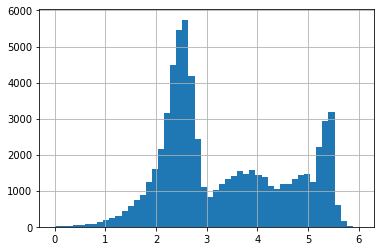

In [43]:
np.log10(dftest_all['predictions_test']+1).hist(bins=50,  range=[0,6])

<AxesSubplot:>

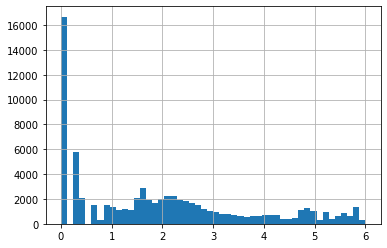

In [44]:
np.log10(dftest_all['timedelta']+1).hist(bins=50,  range=[0,6])

<AxesSubplot:>

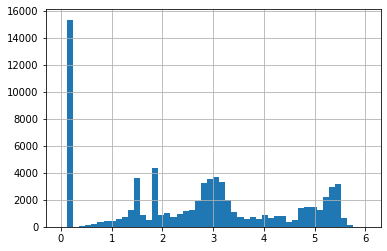

In [45]:
np.log10(dftest_all['predictions']+1).hist(bins=50,  range=[0,6])

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='timedelta', ylabel='predictions_test'>

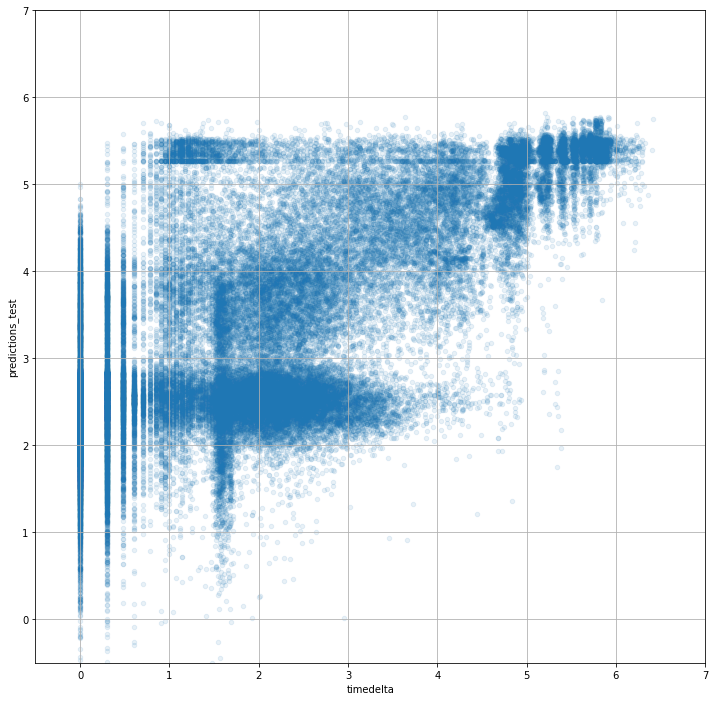

In [46]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='predictions_test',alpha=0.1, figsize=(12,12), grid=True, ylim=(-.5,7), xlim=(-.5,7))

<AxesSubplot:xlabel='timedelta', ylabel='predictions'>

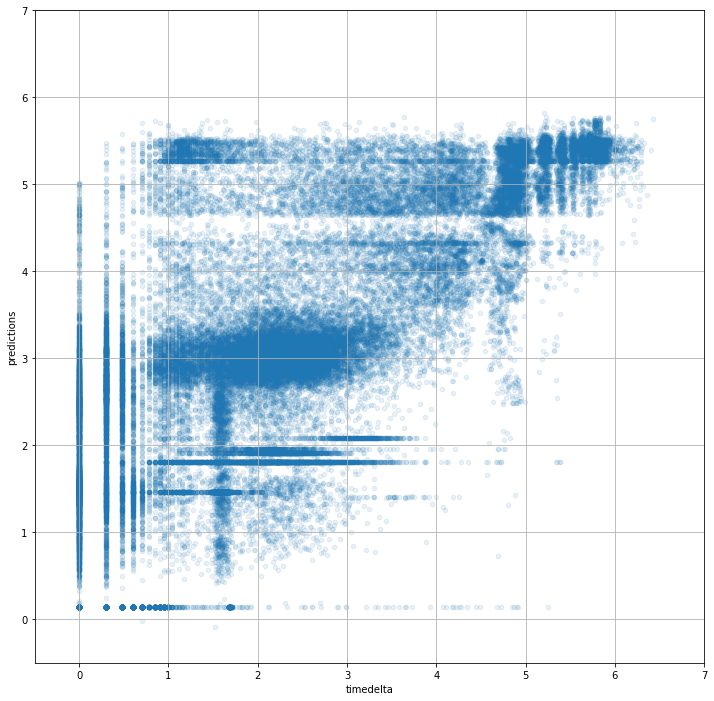

In [47]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='predictions',alpha=0.1, figsize=(12,12), grid=True, ylim=(-.5,7), xlim=(-.5,7))

<AxesSubplot:xlabel='timedelta', ylabel='predictions'>

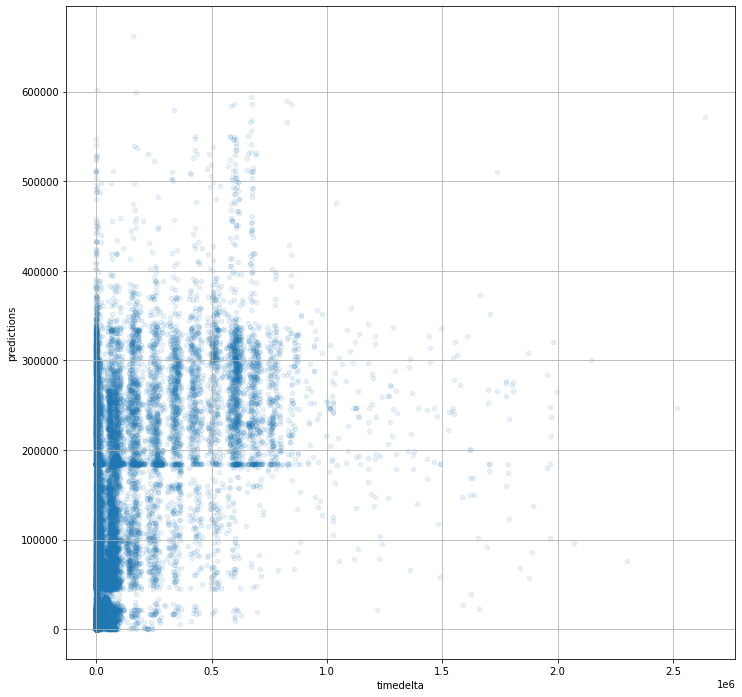

In [48]:
(dftest_all).plot.scatter(x='timedelta', y='predictions',alpha=0.1, figsize=(12,12), grid=True)

<AxesSubplot:xlabel='timedelta', ylabel='error'>

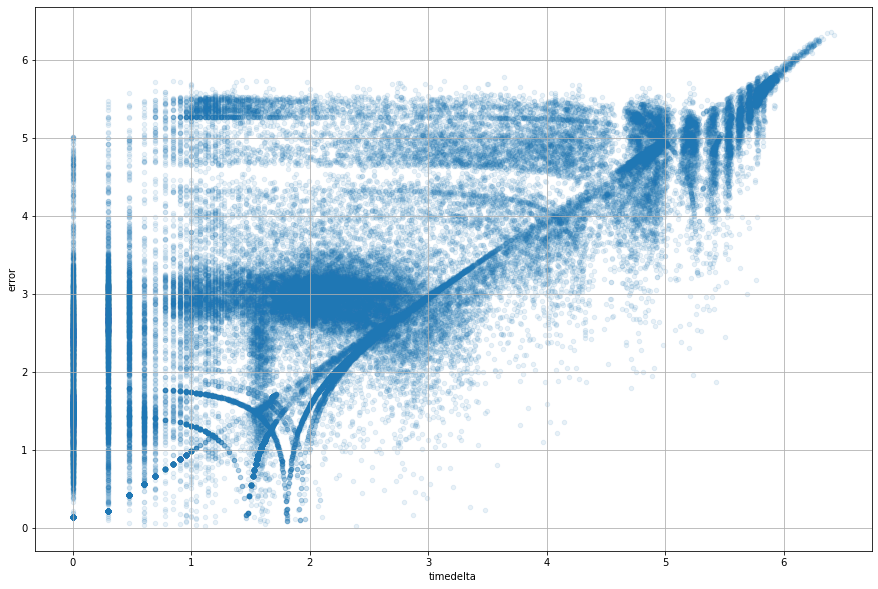

In [49]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='error',alpha=0.1, figsize=(15,10), grid=True)

<AxesSubplot:xlabel='timedelta', ylabel='error'>

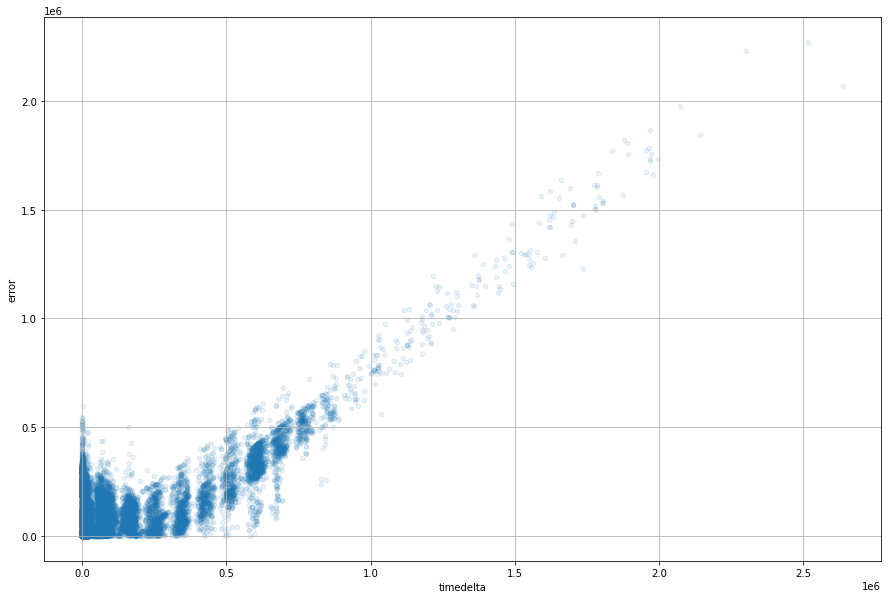

In [50]:
(dftest_all+1).plot.scatter(x='timedelta', y='error',alpha=0.1, figsize=(15,10), grid=True)

In [51]:
end2 = time.time()
print(end2-start)

128.51974391937256


In [55]:
dftest_all['timedelta_log'] = np.log10(dftest_all['timedelta']+1)
dftest_all['predictions_log'] = np.log10(dftest_all['predictions']+1)

<AxesSubplot:xlabel='timedelta_log', ylabel='predictions_log'>

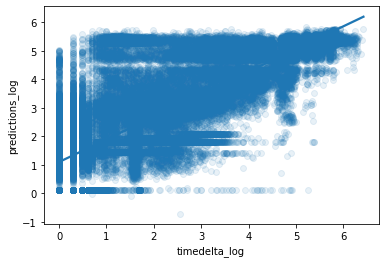

In [56]:
sns.regplot(x='timedelta_log', y='predictions_log', data=dftest_all, scatter_kws={'alpha':0.1}, fit_reg=True)

In [57]:
stats.pearsonr(x=dftest_all['timedelta_log'], y=dftest_all['predictions_log'])

(0.7887031541353137, 0.0)

In [58]:
stats.pearsonr(x=dftest_all['timedelta'], y=dftest_all['predictions'])

(0.6017871231262255, 0.0)

In [59]:
stats.pearsonr(x=dftest_all['timedelta'], y=dftest_all['error'])

(0.8062125805319909, 0.0)